In [2]:
testPath = '/mnt/ibrixfs01-MRI/analysis/washen/temp/test/'

In [3]:
import os
import glob
import scipy.io as sio
import numpy as np
import random
from skimage.transform import resize

In [4]:
patients = glob.glob(testPath+'*T1*')
v_t1 = np.load(patients[0])
v_t2 = np.load(patients[0].replace('T1','T2'))

v_t1 = (v_t1 - np.mean(v_t1))/np.std(v_t1)
v_t2 = (v_t2 - np.mean(v_t2))/np.std(v_t2)

bw = np.load(patients[0].replace('T1','BW'))

In [5]:
"""
This code generates one weight file stored in the current dir (./weights.h5). 

"""

from __future__ import print_function

import os
from skimage.transform import resize
from skimage.io import imsave
import numpy as np
from keras.models import Model
from keras.layers import Input, concatenate, Conv1D, MaxPooling1D, Conv2DTranspose,Lambda
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras import backend as K
import tensorflow as tf
import keras
import cv2
import sys

K.set_image_data_format('channels_last')  # TF dimension ordering in this code
os.environ["CUDA_VISIBLE_DEVICES"]="2"

size= 256
batch_size=16

Using TensorFlow backend.


In [6]:
import unet
model = unet.get_unet()
model.load_weights('weights.h5')

In [ ]:
shape = bw.shape
predVolume = np.zeros(shape)

for sl in range(shape[2]):      
    x = np.zeros((1,size,size,2)) 
    x[0,:,:,0] = (v_t1[:,:,sl]-m1)/sd1
    x[0,:,:,1] = (v_t2[:,:,sl]-m2)/sd2 

    pred = model.predict(x)
    predVolume[:,:,sl] += pred[0,:,:,0]

In [9]:
for i in range(bw.shape[2]):
    if (np.sum(bw[:,:,i])>0):
        print(i)

42
43
44


In [10]:
x = np.zeros((1,size,size,2)) 
sl = 43
x[0,:,:,0] = v_t1[:,:,sl]
x[0,:,:,1] = v_t2[:,:,sl]
pred = model.predict(x)

In [13]:
bw_pred = pred[0,:,:,0]
bw_pred = 1*(bw_pred>0.5)

In [22]:
for i in range(bw_pred.shape[2]):
    if (np.sum(bw_pred[:,:,i])>0):
        print(i)

IndexError: tuple index out of range

In [14]:
from matplotlib import pyplot as plt

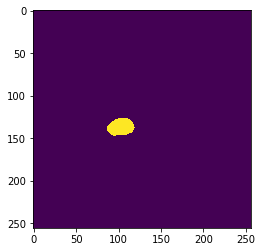

In [17]:
plt.imshow(bw_pred)

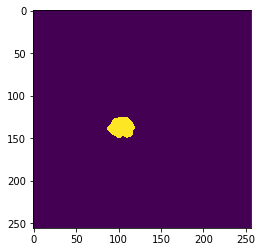

In [18]:
plt.imshow(bw[:,:,sl])